## Deep Learning Black-Scholes Formula - I. PyTorch

In [1]:
import numpy as np
import torch
import csv
import matplotlib.pyplot as plt

In [2]:
dataset = []
with open('../data/black_scholes_with_greeks.csv', newline='\n') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    dataset.append(row)

train_set, test_set = np.array(dataset[:240000], dtype=float), np.array(dataset[240000:], dtype=float)
train_features, train_labels = torch.from_numpy(train_set[:, 0:5]), torch.from_numpy(train_set[:, 5]).reshape(-1, 1)
test_features, test_labels = torch.from_numpy(test_set[:, 0:5]), torch.from_numpy(test_set[:, 5]).reshape(-1, 1)

In [3]:
batch_size = 128
train_iter = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_features, train_labels),
                                         batch_size,
                                         shuffle=True)
test_iter = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_features, test_labels),
                                        batch_size,
                                        shuffle=False)


In [4]:
num_inputs = 5
num_hidden = 100
num_outputs = 1
model = torch.nn.Sequential(torch.nn.Softplus(),
                            torch.nn.Linear(num_inputs, num_hidden),
                            torch.nn.Softplus(),
                            torch.nn.Linear(num_hidden, num_hidden),
                            torch.nn.Softplus(),
                            torch.nn.Linear(num_hidden, num_hidden),
                            torch.nn.Softplus(),
                            torch.nn.Linear(num_hidden, num_hidden),
                            torch.nn.Softplus(),
                            torch.nn.Linear(num_hidden, num_outputs))

In [5]:
loss = torch.nn.MSELoss()

In [11]:
learning_rate = 0.0005
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
num_epochs = 1
for epoch in range(num_epochs):
  for X, y in train_iter:
    l = loss(model(X.float()), y.float())

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

  l = loss(model(train_features.float()), train_labels.float())
  print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.004189


In [14]:
with torch.no_grad():
  print(model(train_features[:5].float()))
  print(train_labels[:5].float())

tensor([[1.0041e-02],
        [1.0054e-02],
        [2.3522e-01],
        [3.4074e+01],
        [2.0148e-04]])
tensor([[0.0000e+00],
        [1.0551e-02],
        [2.4765e-01],
        [3.4387e+01],
        [5.1302e-14]])


In [15]:
with torch.no_grad():
  l = loss(model(test_features.float()), test_labels.float())
  print(f'loss {l:f}')

loss 0.004099


In [16]:
torch.save(model.state_dict(), '../save/black_scholes_pytorch.ckpt')

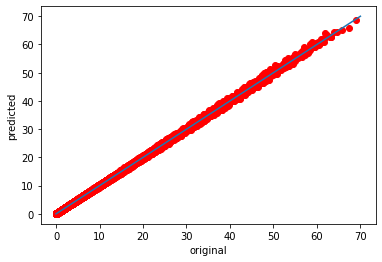

In [17]:
with torch.no_grad():
  predicted = model(train_features.float()).numpy().reshape(-1)
  original = train_labels.numpy().reshape(-1)

  plt.plot(original, predicted, 'ro')
  plt.xlabel("original")
  plt.ylabel("predicted")
  plt.plot([0, 70], [0, 70])
  plt.show()

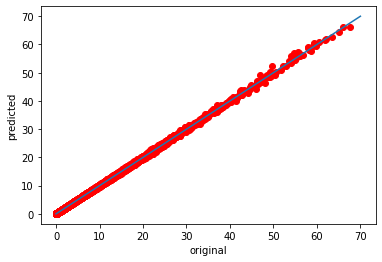

In [18]:
with torch.no_grad():
  predicted = model(test_features.float()).numpy().reshape(-1)
  original = test_labels.numpy().reshape(-1)

  plt.plot(original, predicted, 'ro')
  plt.xlabel("original")
  plt.ylabel("predicted")
  plt.plot([0, 70], [0, 70])
  plt.show()